In [26]:
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt


Carregando os dados

In [2]:
clientes = pd.read_csv('clientes.csv')
produtos = pd.read_csv('produtos.csv')
vendas = pd.read_csv('vendas.csv')
filiais = pd.read_csv('filiais.csv')


Exploração dos dados (dados gerados por inteligência artificial)

In [68]:
clientes.head(5)

,id_cliente,idade,genero,cidade,renda_estimada,frequencia_mensal_media,cliente_vip
0,1,53,Masculino,São Paulo,18829.504792,2.237688,True
1,2,42,Masculino,Belo Horizonte,15101.498206,2.881645,False
2,3,45,Masculino,Recife,17730.778038,3.321475,False
3,4,74,Feminino,Brasília,4736.666151,9.839515,False
4,5,66,Masculino,Rio de Janeiro,11298.535700,3.176671,False


In [90]:
produtos.head(20)

,id_produto,nome_produto,categoria,preco_unitario,custo_unitario,peso_gramas,eh_sazonal
0,1,Chocolate_1,Diet,78.74,42.52,436.973183,True
1,2,Chocolate_2,Diet,56.02,29.98,55.969233,False
2,3,Chocolate_3,Barra,75.67,43.06,223.437426,True
3,4,Chocolate_4,Barra,6.20,2.91,158.461460,True
4,5,Chocolate_5,Trufa,56.24,32.79,424.937710,True
5,6,Chocolate_6,Diet,18.00,9.31,132.006240,True
6,7,Chocolate_7,Diet,61.65,32.52,143.573748,False
7,8,Chocolate_8,Trufa,47.58,19.48,429.028149,False
8,9,Chocolate_9,Diet,38.73,20.08,466.996490,False
9,10,Chocolate_10,Barra,59.55,29.65,306.699788,True


In [41]:
vendas.head(5)

,id_venda,data,id_filial,id_produto,id_cliente,quantidade,preco_unitario_vendido,desconto_percentual,valor_total,forma_pagamento,clima_dia,eh_feriado
0,1,2025-02-09,7,46,1687,3,34.91,20,83.78,Cartão,Frio,False
1,2,2025-09-10,5,1,1939,13,78.74,15,870.08,Pix,Quente,True
2,3,2025-02-02,4,42,1539,11,52.58,15,491.62,Cartão,Chuvoso,False
3,4,2025-08-15,6,6,1463,9,18.00,15,137.70,Pix,Frio,False
4,5,2025-09-11,1,16,2072,5,6.06,0,30.30,Dinheiro,Frio,True


In [17]:
filiais.head(10)

,id_filial,cidade,pais,tamanho_loja_m2,numero_funcionarios,renda_media_regiao,tipo_regiao
0,1,São Paulo,Brasil,143.635030,19,11515.921244,Centro
1,2,Rio de Janeiro,Brasil,199.664621,11,7795.825787,Shopping
2,3,Belo Horizonte,Brasil,74.993729,15,13260.289895,Shopping
3,4,Curitiba,Brasil,200.278753,7,2267.598426,Centro
4,5,Porto Alegre,Brasil,292.477463,16,14201.185217,Rua
5,6,Salvador,Brasil,50.194691,5,5955.149158,Shopping
6,7,Recife,Brasil,181.189108,16,2299.811526,Shopping
7,8,Fortaleza,Brasil,181.193665,14,2606.653622,Shopping
8,9,Brasília,Brasil,293.438880,19,7928.909795,Centro
9,10,Florianópolis,Brasil,246.293990,23,6972.005886,Shopping


Analise dos dados

In [13]:
faturamento_total = vendas['valor_total'].sum()

print(f"O faturamento total é R${faturamento_total:,.2f}")

O faturamento total é R$29,277,655.93


In [16]:
ticket_medio = vendas['valor_total'].mean()

print(f"O valor médio gasto por cliente em cada compra é de R${ticket_medio:.2f}")

O valor médio gasto por cliente em cada compra é de R$292.78


In [20]:
media_quantidade = vendas['quantidade'].mean()

print(f"A média de quantidade de produtos vendidos é de {media_quantidade:.2f} produtos por cliente.")

A média de quantidade de produtos vendidos é de 7.50 produtos por cliente


In [23]:
maior_compra = vendas['valor_total'].max()
print(f"O cliente que fez a maior compra, gastou R${maior_compra:.2f} em produtos.")

O cliente que fez a maior compra, gastou R$1117.62 em produtos


In [24]:
maior_quant = vendas['quantidade'].max()
print(f"O cliente que comprou mais produtos, comprou {maior_quant} produtos.")

O cliente que comprou mais produtos, comprou 14 produtos


Analisando como os clientes preferem pagar pela compra

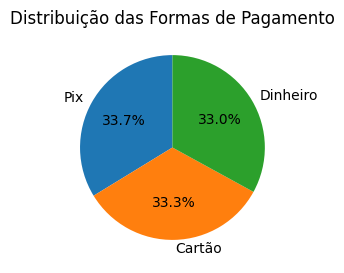

In [29]:
forma_pagamento = vendas['forma_pagamento'].value_counts()

forma_pagamento_percent = forma_pagamento / forma_pagamento.sum() * 100

plt.figure(figsize=(3,3))
plt.pie(
    forma_pagamento_percent,
    labels=forma_pagamento_percent.index,
    autopct='%1.1f%%',
    startangle=90
)
plt.title('Distribuição das Formas de Pagamento')
plt.show()


Analisando vendas por clima

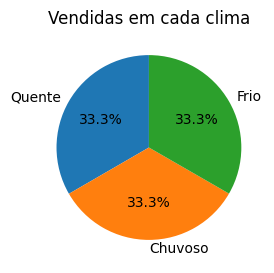

In [32]:
clima_dia = vendas['clima_dia'].value_counts()

clima_dia_percent = clima_dia / clima_dia.sum() * 100

plt.figure(figsize=(3,3))
plt.pie(
    clima_dia_percent,
    labels=clima_dia_percent.index,
    autopct='%1.1f%%',
    startangle=90
)
plt.title('Vendidas em cada clima')
plt.show()

Analisando vendas em feriados ou não feriados

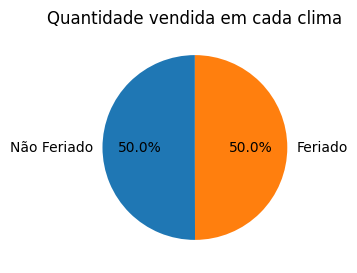

In [35]:
eh_feriado = vendas['eh_feriado'].value_counts()

eh_feriado_percent = eh_feriado / eh_feriado.sum() * 100

labels_map = {True: 'Feriado', False: 'Não Feriado'}
custom_labels = [labels_map[label] for label in eh_feriado_percent.index]

plt.figure(figsize=(3,3))
plt.pie(
    eh_feriado_percent,
    labels=custom_labels,
    autopct='%1.1f%%',
    startangle=90
    )
plt.title('Quantidade vendida em cada clima')
plt.show()

Faturamento por filial

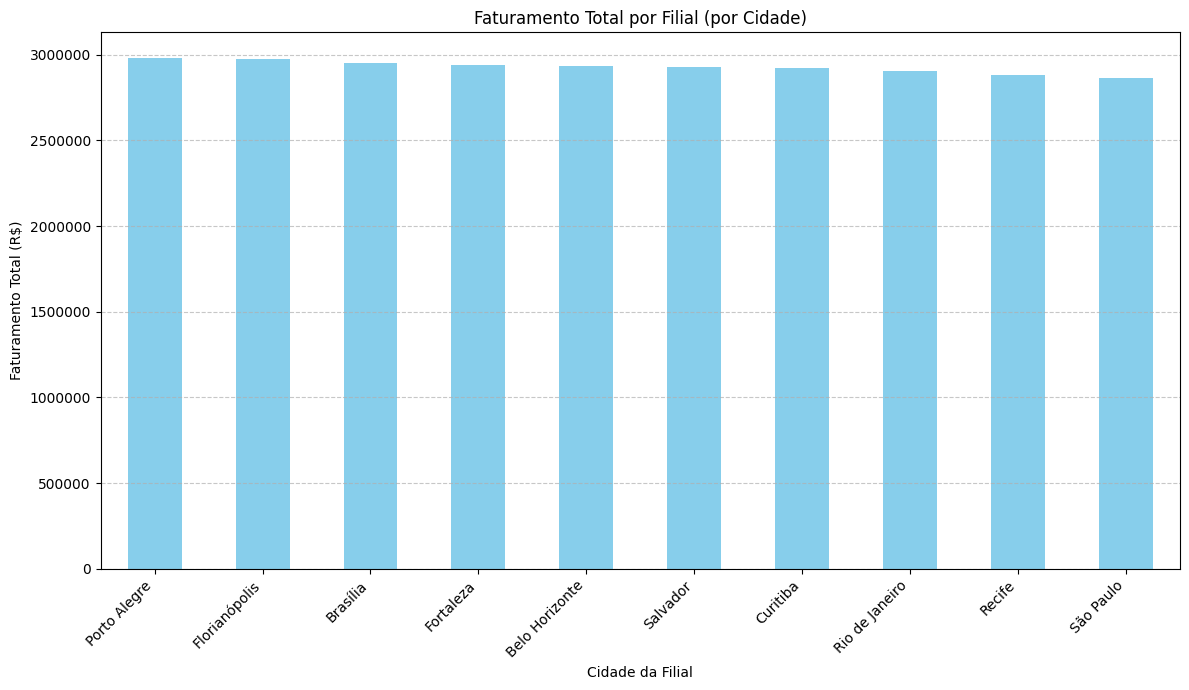

In [43]:
faturamento_filial = vendas.groupby("id_filial")["valor_total"].sum()

# Unir o faturamento_filial com o DataFrame filiais para obter os nomes das cidades
faturamento_por_cidade = pd.merge(faturamento_filial, filiais[['id_filial', 'cidade']], on='id_filial')
faturamento_por_cidade = faturamento_por_cidade.set_index('cidade').sort_values(by='valor_total', ascending=False)

plt.figure(figsize=(12, 7))
faturamento_por_cidade['valor_total'].plot(kind='bar', color='skyblue')
plt.title('Faturamento Total por Filial (por Cidade)')
plt.xlabel('Cidade da Filial')
plt.ylabel('Faturamento Total (R$)')
plt.xticks(rotation=45, ha='right') # Rotacionar os rótulos para melhor visualização
plt.ticklabel_format(style='plain', axis='y')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

Vendas por mês

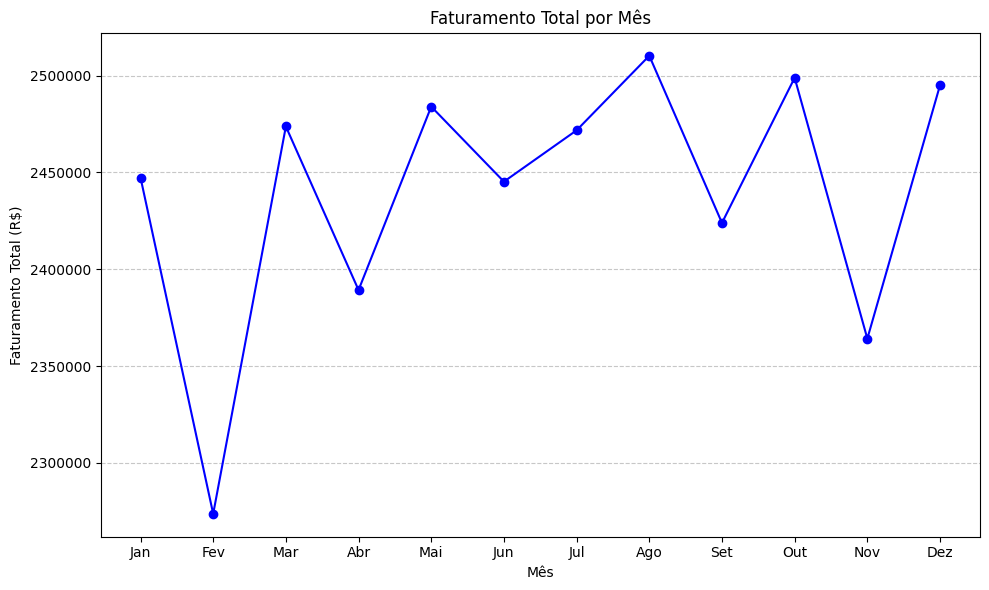

In [45]:
vendas['data'] = pd.to_datetime(vendas['data'])
vendas['mes'] = vendas['data'].dt.month

faturamento_mensal = vendas.groupby('mes')['valor_total'].sum()

plt.figure(figsize=(10, 6))
faturamento_mensal.plot(kind='line', marker='o', color='blue')

plt.title('Faturamento Total por Mês')
plt.xlabel('Mês')
plt.ylabel('Faturamento Total (R$)')
plt.xticks(range(1, 13), ['Jan', 'Fev', 'Mar', 'Abr', 'Mai', 'Jun', 'Jul', 'Ago', 'Set', 'Out', 'Nov', 'Dez'])
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.ticklabel_format(style='plain', axis='y')
plt.tight_layout()
plt.show()

In [54]:
# Ordenar as filiais pela renda média da região em ordem decrescente e selecionar as 3 maiores
top_3_maiores_rendas = filiais.sort_values(by='renda_media_regiao', ascending=False).head(3)

print("As 3 filiais com as maiores rendas médias por região são:")
print(top_3_maiores_rendas[['cidade', 'renda_media_regiao', 'tipo_regiao']])

As 3 filiais com as maiores rendas médias por região são:
           cidade  renda_media_regiao tipo_regiao
4    Porto Alegre        14201.185217         Rua
2  Belo Horizonte        13260.289895    Shopping
0       São Paulo        11515.921244      Centro


In [67]:
top_3_menores_rendas = filiais.sort_values(by='renda_media_regiao', ascending=True).head(3)

print("As 3 filiais com as menores rendas médias por região são:")
print(top_3_menores_rendas[['cidade', 'renda_media_regiao', 'tipo_regiao']])

As 3 filiais com as menores rendas médias por região são:
      cidade  renda_media_regiao tipo_regiao
3   Curitiba         2267.598426      Centro
6     Recife         2299.811526    Shopping
7  Fortaleza         2606.653622    Shopping


Clientes

In [58]:
media = clientes['idade'].mean()
mediana = clientes['idade'].median()
desvio_padrao = clientes['idade'].std()
moda = clientes['idade'].mode()

print(f"""Sobre a idade dos clientes
A média é {media:.2f} anos.
A mediana é {mediana:.0f} anos.
A idade que mais se repete (moda) é {moda.iloc[0]:.0f} anos.
O desvio padrão é {desvio_padrao:.2f}""")

Sobre a idade dos clientes
A média é 44.77 anos.
A mediana é 45 anos.
A idade que mais se repete (moda) é 68 anos.
O desvio padrão é 17.25


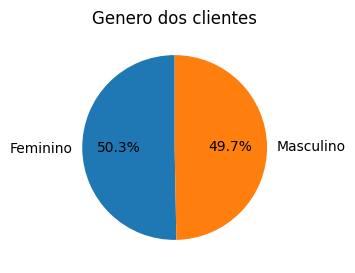

In [62]:
genero = clientes['genero'].value_counts()

genero_percent = genero / genero.sum() * 100

plt.figure(figsize=(3,3))
plt.pie(
    genero_percent,
    labels=genero_percent.index,
    autopct='%1.1f%%',
    startangle=90
)
plt.title('Genero dos clientes')
plt.show()

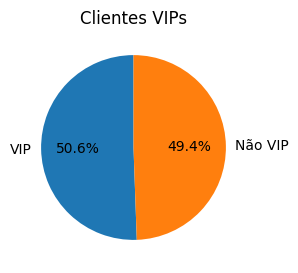

In [64]:
vip = clientes['cliente_vip'].value_counts()

vip_percent = vip / vip.sum() * 100

labels_map = {True: 'VIP', False: 'Não VIP'}
custom_labels = [labels_map[label] for label in vip_percent.index]

plt.figure(figsize=(3,3))
plt.pie(
    vip_percent,
    labels=custom_labels,
    autopct='%1.1f%%',
    startangle=90
    )
plt.title('Clientes VIPs')
plt.show()

Top 5 clientes mais frequentes

In [73]:


top_5 = clientes.sort_values(by='frequencia_mensal_media', ascending=False).head(5)

print("Top 5 clientes mais frequentes são:")
print(top_5[['id_cliente','idade','genero','cidade','renda_estimada','frequencia_mensal_media','cliente_vip']])

Top 5 clientes mais frequentes são:
      id_cliente  idade     genero          cidade  renda_estimada  \
138          139     42   Feminino        Brasília    16538.668669   
2471        2472     53   Feminino       São Paulo     4164.059643   
330          331     24  Masculino  Belo Horizonte    12382.879504   
2212        2213     34  Masculino       São Paulo    16664.024551   
2111        2112     56   Feminino       Fortaleza     9492.195340   

      frequencia_mensal_media  cliente_vip  
138                  9.997459         True  
2471                 9.995211         True  
330                  9.994181         True  
2212                 9.994153         True  
2111                 9.991445         True  


Analise de produtos

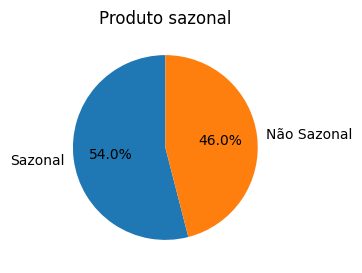

In [74]:
sazonal = produtos['eh_sazonal'].value_counts()

sazonal_percent = sazonal / sazonal.sum() * 100

labels_map = {True: 'Sazonal', False: 'Não Sazonal'}
custom_labels = [labels_map[label] for label in vip_percent.index]

plt.figure(figsize=(3,3))
plt.pie(
    sazonal_percent,
    labels=custom_labels,
    autopct='%1.1f%%',
    startangle=90
    )
plt.title('Produto sazonal')
plt.show()

In [75]:
media_prod = produtos['preco_unitario'].mean()
print(f'O preço médio dos produtos é de R${media_prod:.2f}')

O preço médio dos produtos é de R$43.30


In [86]:

produtos_caros = produtos.loc[produtos['preco_unitario'] > media_prod, ['nome_produto', 'preco_unitario','custo_unitario',	'peso_gramas']]
produtos_caros = produtos_caros.sort_values(by='preco_unitario', ascending=False)
display(produtos_caros)
print("Produtos que custam mais que a média")

,nome_produto,preco_unitario,custo_unitario,peso_gramas
39,Chocolate_40,79.83,38.32,489.476730
0,Chocolate_1,78.74,42.52,436.973183
21,Chocolate_22,77.88,50.99,374.778285
12,Chocolate_13,77.39,45.05,174.199632
27,Chocolate_28,75.71,43.89,362.653220
2,Chocolate_3,75.67,43.06,223.437426
28,Chocolate_29,71.04,41.72,183.035159
47,Chocolate_48,69.38,34.54,149.108471
44,Chocolate_45,65.24,35.30,492.540413
16,Chocolate_17,64.26,37.39,466.835395


Produtos que custam mais que a média


In [84]:
produtos_baratos = produtos.loc[produtos['preco_unitario'] < media_prod, ['nome_produto', 'preco_unitario','custo_unitario','peso_gramas']]
produtos_baratos = produtos_baratos.sort_values(by='preco_unitario', ascending=True)
display(produtos_baratos)
print("Produtos que custam menos que a média")

,nome_produto,preco_unitario,custo_unitario,peso_gramas
15,Chocolate_16,6.06,2.79,370.103879
3,Chocolate_4,6.20,2.91,158.461460
37,Chocolate_38,9.87,4.70,161.094228
43,Chocolate_44,11.06,5.65,158.971972
49,Chocolate_50,12.21,8.33,228.907409
29,Chocolate_30,12.91,6.93,148.298197
31,Chocolate_32,14.16,7.18,458.072799
46,Chocolate_47,16.30,9.01,363.115763
5,Chocolate_6,18.00,9.31,132.006240
24,Chocolate_25,20.13,13.46,263.916600


Produtos que custam menos que a média


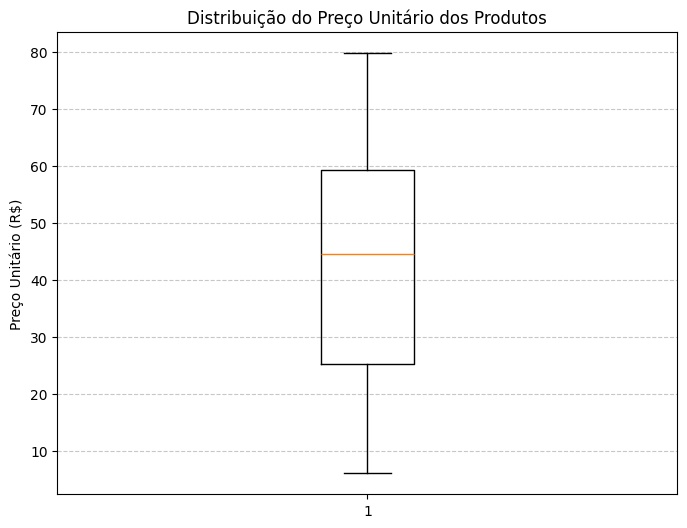

In [83]:
plt.figure(figsize=(8, 6))
plt.boxplot(produtos['preco_unitario'])
plt.title('Distribuição do Preço Unitário dos Produtos')
plt.ylabel('Preço Unitário (R$)')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

Faturamento total por filial

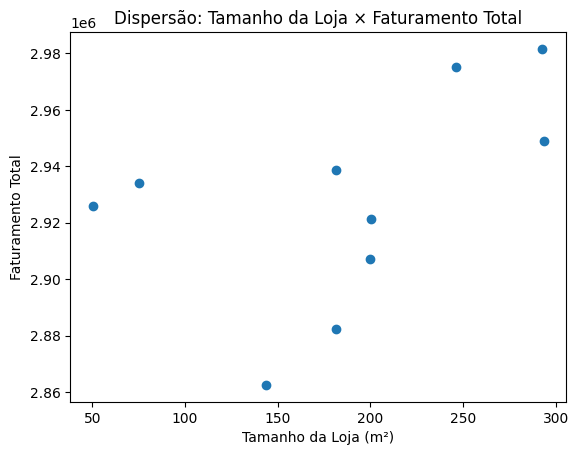

In [89]:
faturamento_filial = (
vendas.groupby("id_filial")["valor_total"].sum().reset_index())
dados = faturamento_filial.merge(filiais, on="id_filial")

plt.figure()
plt.scatter(dados["tamanho_loja_m2"], dados["valor_total"])

plt.xlabel("Tamanho da Loja (m²)")
plt.ylabel("Faturamento Total")
plt.title("Dispersão: Tamanho da Loja × Faturamento Total")

plt.show()

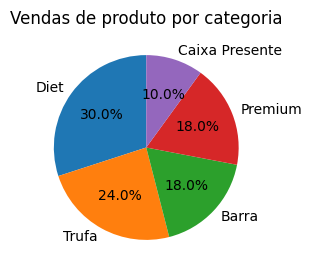

In [91]:
categoria = produtos['categoria'].value_counts()

categoria_percent = categoria / categoria.sum() * 100

plt.figure(figsize=(3,3))
plt.pie(
    categoria_percent,
    labels=categoria_percent.index,
    autopct='%1.1f%%',
    startangle=90
)
plt.title('Vendas de produto por categoria')
plt.show()